# Building dashboards with streamlit

In [20]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static

### Wrangle data

In [21]:
#import data

df = pd.read_csv('NY_data_sample.csv', index_col = 0)

C:\Users\Barb\AppData\Local\Temp\ipykernel_3264\1702794093.py:3: DtypeWarning:

Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.



In [22]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

In [23]:
# Create a month column 

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [24]:
# Create the season column

df['season'] = [
"winter" if (month == 12 or 1 <= month <= 4)
    else "spring" if (4 < month <= 5)
    else "summer" if (6 <= month <= 9)
    else "fall"
for month in df['month']
    ]

In [25]:
df.shape

(5967761, 18)

In [26]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'month', 'season'],
      dtype='object')

## Create the plotly charts

In [27]:
## Groupby

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

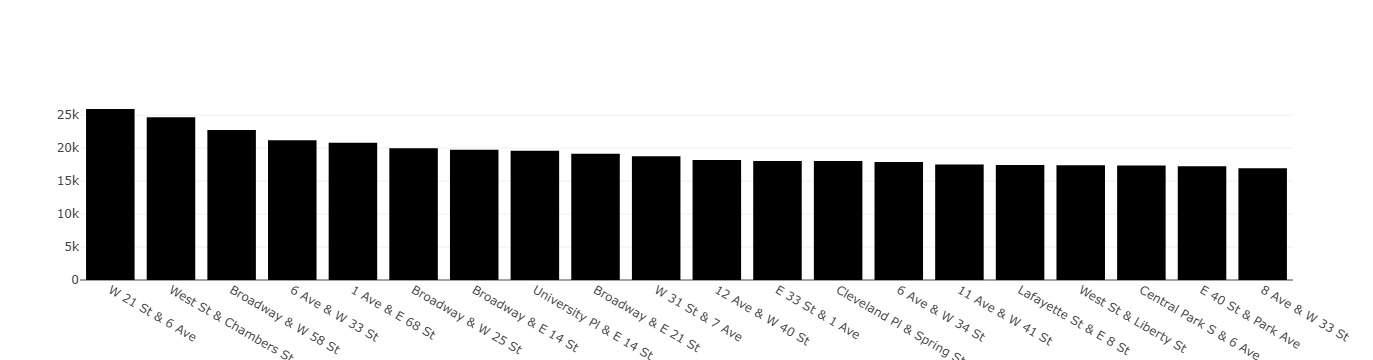

In [28]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

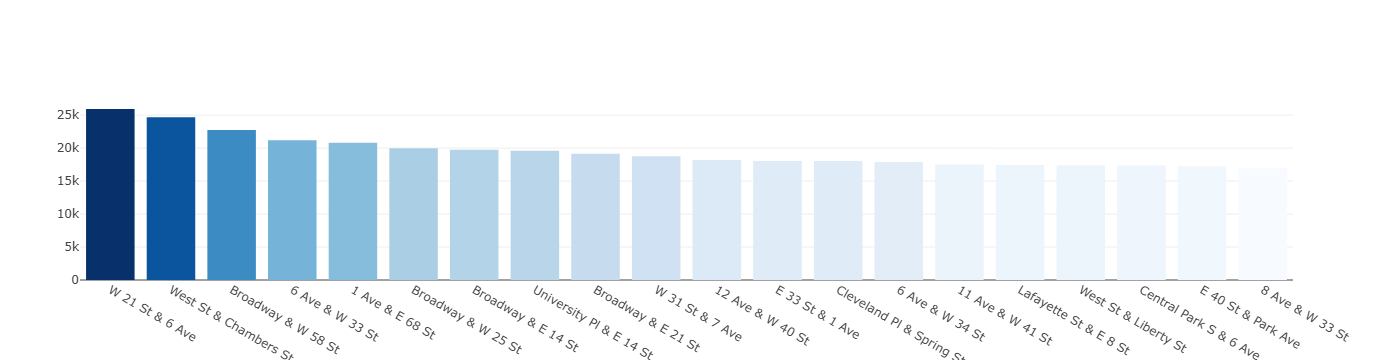

In [29]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Blues'}))
fig.show()

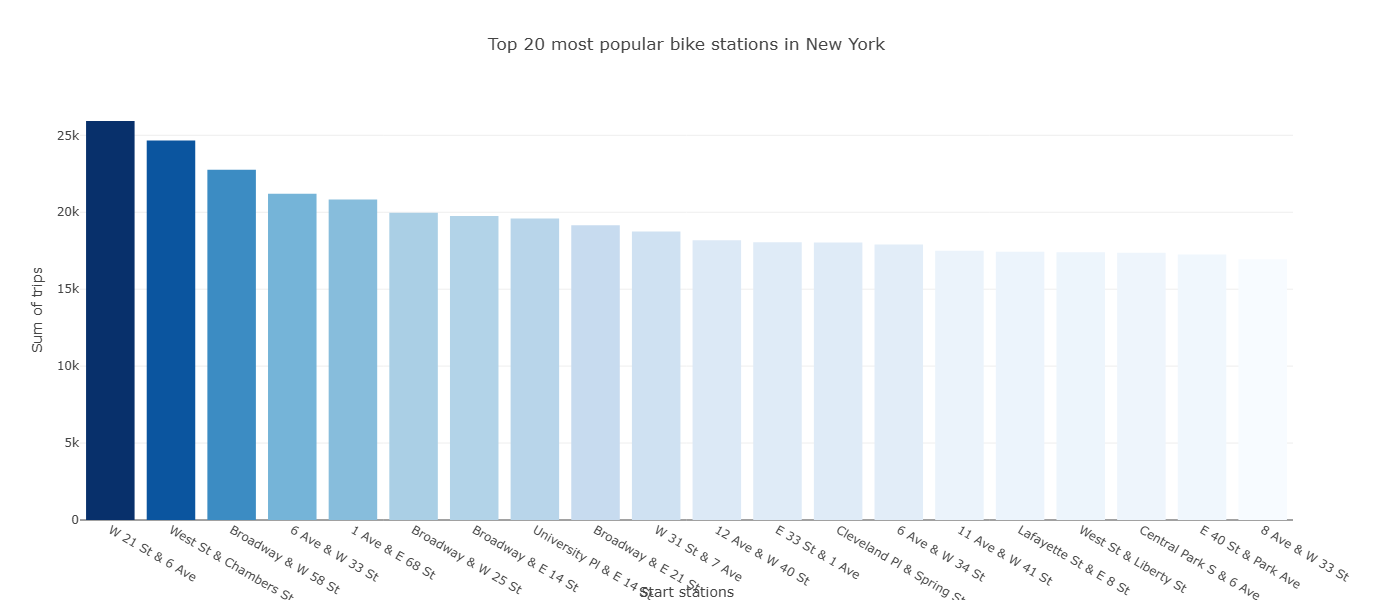

In [30]:
## Bar chart

fig.update_layout(
    title = 'Top 20 most popular bike stations in New York',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
    width = 900, height = 600
)

### Plot dual-axis line chart for the aggregated bike trips and temperatures in plotly

In [15]:
### Import the df with data containing bike rides daily and avg temperatures for each month of the year 2022

In [16]:
df_dual_axis = pd.read_csv(os.path.join(path, '02Data', 'Prepared', 'NY_data_sample_2-4.csv'), index_col = 0)

In [18]:
#Change date to datetime64 format; reading data from csv file automatically puts date in object format
df_dual_axis['date'] = pd.to_datetime(df_dual_axis['date'])

KeyError: 'date'

#### _The next chart's output has been deleted because it inflates the notebook's size a lot_ 

In [19]:
# Line chart

fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(
go.Scatter(x = df_dual_axis['date'], y = df_dual_axis['ride_id'], name = 'Daily bike rides'),
secondary_y = False
)

#fig.add_trace(
#go.Scatter(x=df['date'], y = df['avgTemp'], name = 'Daily temperature'),
#secondary_y=True
#)

KeyError: 'date'

In [18]:
#import gc # this is a garbage collector
#gc.collect()

In [19]:
# Save the top 20 stations as a csv file 

#top20.to_csv('top20.csv')

In [20]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'month', 'season',
       'value'],
      dtype='object')

In [20]:
#df_1.columns

Index(['start_station_name', 'end_station_name', 'date', 'avgTemp', 'value',
       'bike_rides_daily', 'season'],
      dtype='object')

### Reduce the row and column count

In [19]:
# Create a copy with fewer columns

df_1 = df.drop(columns = {'trip_id', 'start_time', 'end_time', 'bikeid',
       'tripduration', 'from_station_id', 'to_station_id', 'usertype', 'gender', 'birthyear',
                          'birth_year', 'birth_year_2', 'age','merge_flag', 'month'}) 

##### Create a random split

In [24]:
np.random.seed(32)
red = np.random.rand(len(df_1)) <= 0.92

In [25]:
small = df_1[~red]

In [26]:
small.shape

(287405, 7)

In [27]:
small.to_csv('reduced_data_to_plot_7.csv',index = False)

In [28]:
df_1.to_csv('reduced_data_to_plot.csv')